# Assignment 2

## Global imports

In [1]:
import shap
import pickle

import numpy as np
import pandas as pd

import tensorflow as tf

from keras.models import Sequential
from keras import layers
from keras import losses
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import os
import glob
import math
import pathlib
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt

import eli5
from eli5.sklearn import PermutationImportance

/Users/tilmankerl/Documents/UNI/01_WS22/AI Clima/assignment/02/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from climateai.processing.process import Process
from climateai.processing.data_loading import DataLoader

## Data Loading and Processing

In [3]:
dl = DataLoader()
full_df = dl.load()

X_train, X_test, y_train, y_test, X_wins_train, X_wins_test, X_scaled_train, X_scaled_test = Process.split_data(full_df)

100%|██████████| 100/100 [00:01<00:00, 86.19it/s]


## Neural Network

In [4]:
from climateai.models.neural_net import NeuralNet

### Training

In [5]:
nn = NeuralNet()

In [6]:
nn.load_model()

True

In [7]:
# nn.train(X_scaled_train, y_train)
if not nn.load_model():
    nn.train(X_scaled_train, y_train)

### Evaluation

In [8]:
nn.evaluate(X_scaled_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                600       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 1,849
Trainable params: 1,849
Non-trainable params: 0
_________________________________________________________________
  151/13354 [..............................] - ETA: 4s - loss: 9.7084 - precision: 0.9642 - auc: 0.8922   

2023-01-10 02:01:17.190710: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


13354/13354 [==============================] - 4s 313us/step - loss: 9.7842 - precision: 0.9616 - auc: 0.8842
 Model MSE on the test set: [9.784172058105469, 0.9615955352783203, 0.8842434883117676]


### Feature Importance

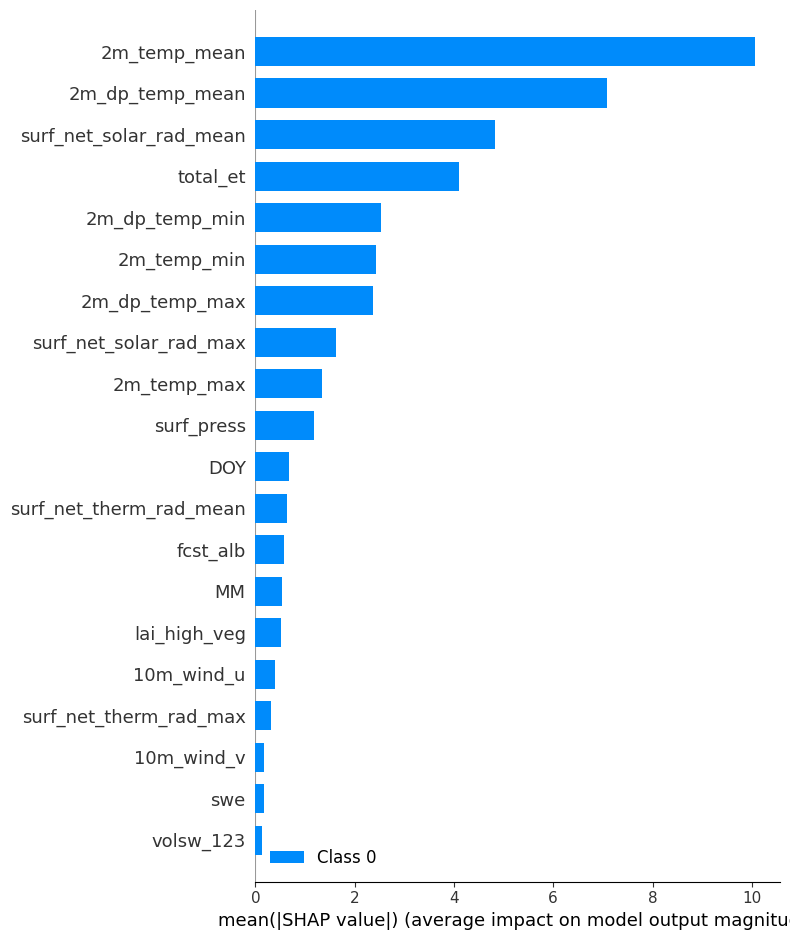

In [9]:
nn.find_best_parameters(X_scaled_test, X_test.columns)

## Deep Neural Network

In [10]:
from climateai.models.deep_neural_net import DeepNeuralNet

### Training

In [11]:
dnn = DeepNeuralNet()

In [12]:
# nn.train(X_scaled_train, y_train)
if not dnn.load_model():
    dnn.train(X_scaled_train, y_train)

### Evaluation

In [13]:
dnn.evaluate(X_scaled_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 48)                1200      
                                                                 
 dense_5 (Dense)             (None, 48)                2352      
                                                                 
 dense_6 (Dense)             (None, 48)                2352      
                                                                 
 dense_7 (Dense)             (None, 48)                2352      
                                                                 
 dense_8 (Dense)             (None, 48)                2352      
                                                                 
 dense_9 (Dense)             (None, 48)               

### Feature Importance

[Errno 2] No such file or directory: '/Users/tilmankerl/Documents/UNI/01_WS22/AI Clima/assignment/02/climateai/models/shap-values-dnn.pk'
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


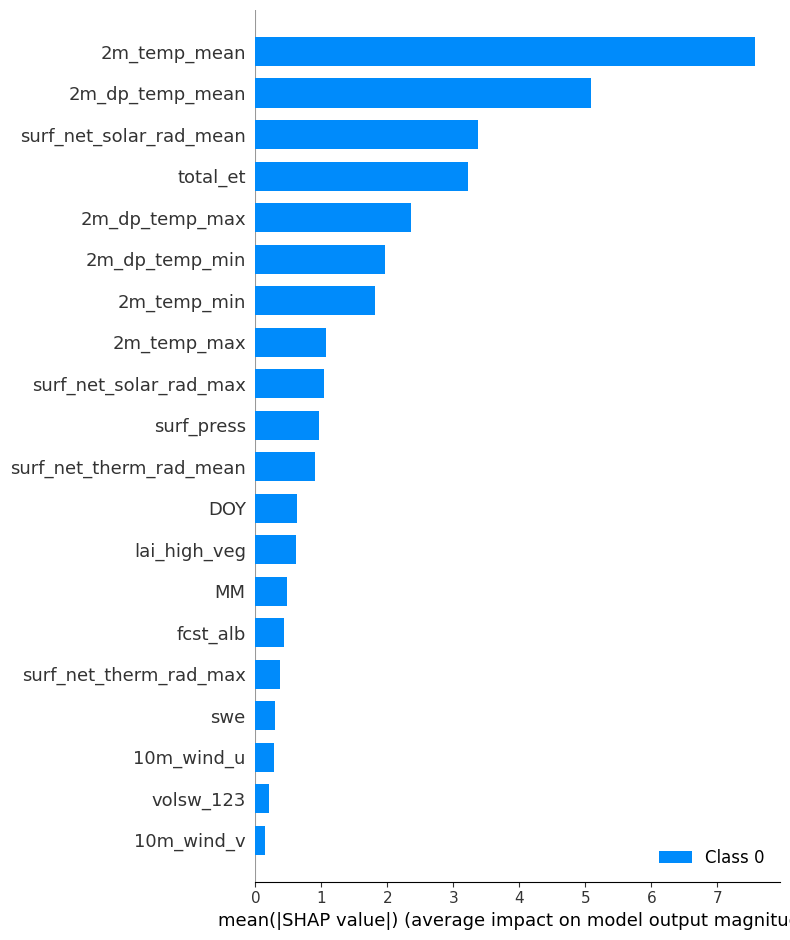

In [14]:
dnn.find_best_parameters(X_scaled_test, X_test.columns)